In [1]:
import numpy as np
import tensorflow as tf

D:\Anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
#初始化tensorflow变量
a = tf.Variable([[2,2],[2,2]])
b = tf.Variable([[1,0],[0,1]])
y = tf.matmul(a,b)
print(y)
#初始化操作
init_op = tf.global_variables_initializer()
#执行操作
with tf.Session() as sess:
    sess.run(init_op)
    print(y.eval())

Tensor("MatMul_5:0", shape=(2, 2), dtype=int32)
[[2 2]
 [2 2]]


In [19]:
tf.zeros([2,2])

<tf.Tensor 'zeros_4:0' shape=(2, 2) dtype=float32>

In [20]:
tensor = [[1,2,3],[4,5,6]]
tf.zeros_like(tensor)

<tf.Tensor 'zeros_like_1:0' shape=(2, 3) dtype=int32>

In [25]:
tensor = tf.constant([1,2,3,4,5,6,7])
tensor
with tf.Session() as sess:
    sess.run(tensor)
    print(tensor.eval())

[1 2 3 4 5 6 7]


In [30]:
tensor = tf.constant(-2,shape=[2,3])
with tf.Session() as sess:
    sess.run(tensor)
    print(tensor.eval())

[[-2 -2 -2]
 [-2 -2 -2]]


In [36]:
tensor = tf.linspace(10.0,25.0,3 , name="linspace")
with tf.Session() as sess:
    sess.run(tensor)
    print(tensor.eval())

[10.  17.5 25. ]


In [38]:
tensor = tf.range(3,18,3)
with tf.Session() as sess:
    sess.run(tensor)
    print(tensor.eval())

[ 3  6  9 12 15]


In [42]:
#tensor建立高斯分布
norm = tf.random_normal([2,3],mean=-1,stddev=4)
#随机洗牌
c = tf.constant([[1,2],[3,4],[5,6]])
shuff = tf.random_shuffle(c)
with tf.Session() as sess:
    print(sess.run(norm))
    print(sess.run(shuff))

[[-1.084341    2.5952845  -3.0958624 ]
 [ 0.22219884  1.2370648  -2.6280513 ]]
[[3 4]
 [5 6]
 [1 2]]


In [44]:
state = tf.Variable(0)
new_value = tf.add(state,tf.Variable(1))
update = tf.assign(state,new_value)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(state))
    for _ in range(10):
        print(sess.run(update))

0
1
2
3
4
5
6
7
8
9
10


In [58]:
value = tf.Variable(2)
state = tf.multiply(value,tf.Variable(2))
new_value = tf.assign(value,state)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(10):
        print(sess.run(new_value))
    save_path = tf.train.Saver().save(sess,r"D:\workspace\tensorflow\demo.mdl")
    print(save_path)

4
8
16
32
64
128
256
512
1024
2048
D:\workspace\tensorflow\demo.mdl


In [61]:
#numpy 转化为tensor
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)

<tf.Tensor 'Const_14:0' shape=(3, 3) dtype=float64>

In [62]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)
with tf.Session() as sess:
    print(sess.run([output],feed_dict={input1:[7,],input2:[2]}))

[array([14.], dtype=float32)]


# tensorflow 建立简单线性模型


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

D:\Anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


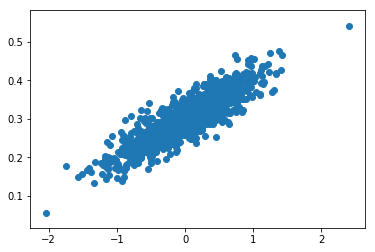

In [3]:
#随机生成1000个点，符合高斯分布
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1*0.1+0.3 +np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data)
plt.show()

W =  [1.143322] b =  [0.]  loss =  0.41213286
W =  [0.83391297] b =  [0.2936862]  loss =  0.16176707
W =  [0.614859] b =  [0.29573932]  loss =  0.08010251
W =  [0.46114025] b =  [0.2971929]  loss =  0.039887745
W =  [0.3532697] b =  [0.29821292]  loss =  0.020084435
W =  [0.27757263] b =  [0.2989287]  loss =  0.010332519
W =  [0.224453] b =  [0.299431]  loss =  0.0055302996
W =  [0.18717685] b =  [0.2997835]  loss =  0.0031655012
W =  [0.1610187] b =  [0.30003083]  loss =  0.0020009838
W =  [0.14266248] b =  [0.30020443]  loss =  0.0014275297
W =  [0.12978119] b =  [0.30032623]  loss =  0.001145139
W =  [0.12074187] b =  [0.3004117]  loss =  0.0010060789
W =  [0.11439863] b =  [0.30047166]  loss =  0.00093760027
W =  [0.10994732] b =  [0.30051377]  loss =  0.00090387894
W =  [0.10682367] b =  [0.3005433]  loss =  0.00088727317
W =  [0.10463168] b =  [0.30056402]  loss =  0.0008790958
W =  [0.10309347] b =  [0.30057856]  loss =  0.00087506894
W =  [0.10201404] b =  [0.3005888]  loss =  

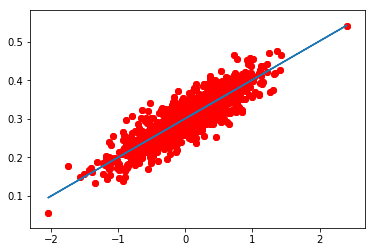

In [16]:
#生成1纬矩阵，取值【-1,1】之间的随机数
W = tf.Variable(tf.random_uniform([1],-5.0,5.0),name="W")
b = tf.Variable(tf.zeros([1]),name = 'b')
#y = wx+b
y = W*x_data+b
#构建损失函数，以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data),name = "loss")
#采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
#训练的过程就是最小化这个误差
train = optimizer.minimize(loss,name = "train")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("W = ",sess.run(W),"b = ",sess.run(b)," loss = ",sess.run(loss))
    for step in range(20):
        sess.run(train)
        print("W = ",sess.run(W),"b = ",sess.run(b)," loss = ",sess.run(loss))
    plt.scatter(x_data,y_data,c = 'r')
    plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
    plt.show()

# mnist数据集

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

In [29]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(type(input_data))
print(mnist)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
<class 'module'>
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001A9E2128>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001ACC24A8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001ACC22E8>)


In [43]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels
print(trainimg.shape)
print(trainlabel.shape)
print(testimg.shape)
print(testlabel.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


[25564 11590 25737 53373 26430]


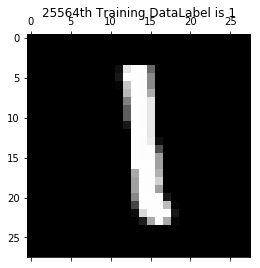

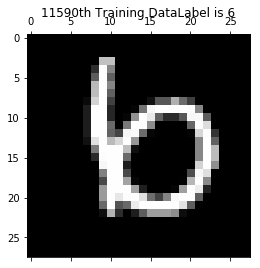

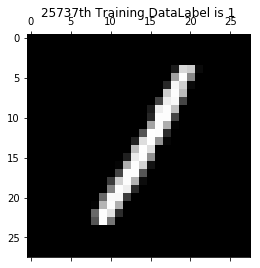

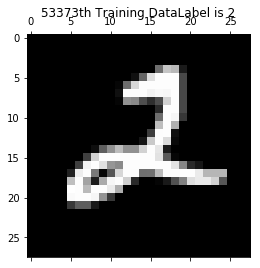

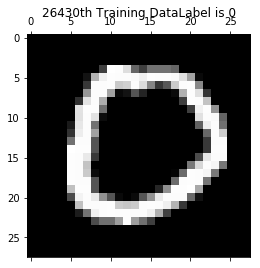

In [55]:
nsample = 5
randidx = np.random.randint(trainimg.shape[0],size = nsample)
print(randidx)

for i in randidx:
    curr_img = np.reshape(trainimg[i,:],(28,28))
    curr_label = np.argmax(trainlabel[i,:])
    plt.matshow(curr_img,cmap= plt.get_cmap('gray'))
    plt.title(""+str(i)+"th Training Data" +"Label is "+str(curr_label))
#     plt.title(""+str(i)+"th Testimg Data" +"Label is "+str(curr_label))
    plt.show()

In [61]:
batch_size = 200
batch_x,batch_y = mnist.train.next_batch(batch_size)
print(type(batch_x))
print(batch_x.shape)
print(batch_y.shape)

<class 'numpy.ndarray'>
(200, 784)
(200, 10)


# 逻辑回归，分类mnist

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.examples.tutorials.mnist import input_data

D:\Anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
trainimg = mnist.train.images
trainlabels = mnist.train.labels
testimg = mnist.test.images
testlabels = mnist.test.labels
print(trainimg.shape)
print(trainlabels.shape)
print(testimg.shape)
print(testlabels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [4]:
#建立回归模型
#占位一个图片矩阵
x = tf.placeholder("float",[None,28*28])
#一张图片的分类矩阵
y = tf.placeholder("float",[None,10])
W = tf.Variable(tf.zeros([28*28,10]))
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     print(sess.run(W).shape)
b = tf.Variable(tf.zeros([10]))
#LOGISITC REGRESSION MODEL
actv = tf.nn.softmax(tf.matmul(x,W)+b)
#损失函数
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv),reduction_indices=1))
learning_rate = 0.01
#优化器,梯度下降
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [5]:
#预测，argmax(arr,0/1),传入一个数组，返回行或列的最大值索引
pred = tf.equal(tf.argmax(actv,1),tf.argmax(y,1))
#accuracy
accr = tf.reduce_mean(tf.cast(pred,"float"))

In [10]:
train_epochs = 50
batch_size = 100
display_step = 5

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    avg_cost = 0
    num_batch = int(mnist.train.num_examples/batch_size)
    for i in range(num_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm,feed_dict={x:batch_xs,y:batch_ys})
        feeds = {x:batch_xs,y:batch_ys}
        avg_cost += sess.run(loss,feed_dict=feeds)/num_batch
        
    if epoch % display_step == 0 :
        feeds_train = {x:batch_xs,y:batch_ys}
        feeds_test = {x:testimg,y:testlabels}
        train_acc = sess.run(accr,feed_dict = {x:batch_xs,y:batch_ys})
        test_acc = sess.run(accr ,feed_dict= {x:mnist.test.images,y:mnist.test.labels})
        print("Epoch:%03d/%03d cost:%.9f  train_acc:%.3f test_acc:%.3f" 
                 %(epoch,train_epochs,avg_cost,train_acc,test_acc))
print("Done")

Epoch:000/050 cost:1.176858337  train_acc:0.890 test_acc:0.853
Epoch:005/050 cost:0.439693908  train_acc:0.910 test_acc:0.895
Epoch:010/050 cost:0.384673994  train_acc:0.880 test_acc:0.905
Epoch:015/050 cost:0.361634797  train_acc:0.850 test_acc:0.909
Epoch:020/050 cost:0.340080030  train_acc:0.910 test_acc:0.912
Epoch:025/050 cost:0.332265394  train_acc:0.900 test_acc:0.913
Epoch:030/050 cost:0.325296794  train_acc:0.920 test_acc:0.916
Epoch:035/050 cost:0.314772984  train_acc:0.870 test_acc:0.916
Epoch:040/050 cost:0.308610545  train_acc:0.920 test_acc:0.917
Epoch:045/050 cost:0.305255500  train_acc:0.940 test_acc:0.918
Done
